In [ ]:
# 1
# Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
# 1-From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
# 2-Now Find the number of posts these handles have done in the previous 3 days.
# 3-Depict this information using a suitable graph.

In [ ]:
#importing packages
from selenium import webdriver
import os
import sys 
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#creating a drver session and loading instagram
#then logging into my account

os.path.dirname(sys.executable)
driver = webdriver.Chrome()
driver.get('https://instagram.com')
user = driver.find_elements_by_css_selector('form input')[0]
user.send_keys("Sample ID")

pas = driver.find_elements_by_css_selector('form input')[1]
pas.send_keys("Sample Password")

form = driver.find_element_by_tag_name('form')
form.submit()

In [ ]:
#search for food as keyword
search= driver.find_element(By.XPATH,'//input[@placeholder = "Search"]')
search.clear()
search.send_keys('food')


In [ ]:
#collecting all the profiles in drop down menu
name_class = driver.find_elements(By.XPATH,"//div[@class = '_9_68 _9_6b _9_6i _9_6j _9_6t']")

In [ ]:
#storing the accounts except hashtags
names = []
for name in name_class[:11]:
    i = name.get_attribute('innerHTML')
    if i[0] != '#':
        #name list to store the user names
        names.append(i)
for name in names:     
    print(name)


In [ ]:
#function to store follower count

#dictionary to store user names with their respective counts 
d_names = {}
#takes user name as parameter
def count_followers(name):
    
    base_url = 'https:www.instagram.com/'
    driver.get(base_url+name)
    driver.implicitly_wait(15)
    data = driver.find_element(By.XPATH,"//li[@class = '_9_da'][2]/a/div/span")
   
    driver.implicitly_wait(10)
    count = int(data.get_attribute('title').replace(',',''))
    d_names[name] = count
for name in names:
    count_followers(name)

In [ ]:
#sorting the dictionary by followers count
d_names = dict(sorted(d_names.items(),key = lambda item: item[1],reverse = True)[:5])
for name in d_names:
    print(name,'-',d_names[name])

In [ ]:
# 1.2 - Now Find the number of posts these handles have done in the previous 3 days.
p_names = {}
base_url = 'https:www.instagram.com/'

#functon to count number of posts posted by the user in the last three days
def count_posts(name):
    count = 0
    driver.get(base_url+name)
    driver.implicitly_wait(15)
    
    post = WebDriverWait(driver,15).until(EC.presence_of_element_located((By.XPATH,"//div[@class='_9_92']"))) 
    post.click()
    driver.implicitly_wait(15)
    #traversing all posts and checking their upload time
    while True:
        #obtaining date function
        date = driver.find_element(By.XPATH,"//time[@class = '_9_wy _a41t']")
        time = date.get_attribute('innerHTML')
        driver.implicitly_wait(15)
        #if time is in sec,hour or min,like 1s,1m or 1h ,format then it will increase the count
        if time[-1] in ['h' ,'s','m']:
            count += 1
        #else if the time is in days,it will check for the number
        #we traverse till last second element to get the number,like 2d will mean 2 days ago
        elif time[-1] == 'd':
            d = int(time[:-1])
            if d < 4:
                count += 1
        #else it will be years so we will break the loop
        else:
            driver.back()
            break
        #we click on next button to visit next post
        next_button = driver.find_element(By.XPATH,"//div[@class = ' _a1bt _a2jd']/button").click()
        driver.implicitly_wait(15)
    #it is a dictionary to store the user name as key and it's post count as value
    p_names[name] = count

for name in p_names:
    count_posts(name)
    

In [ ]:
# 1.3-Depict this information using a suitable graph.

users = []
posts = []
#extractng the names and counts from the dictionary into lists
for ele in p_names:
    users.append(ele)
    posts.append(p_names[ele])
    
#plotting bar graph
plt.bar(users,posts)
plt.xticks(rotation = 90)
plt.grid()
plt.show()
    

In [ ]:
# 2-->Your friend also needs a list of hashtags that he should use in his posts.
# 1 - Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
# 2 - prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
# 3 - Create a csv file with two columns : the word and its frequency
# 4 - Now, find the hashtags that were most popular among these bloggers
# 5 - Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.



In [192]:
# 2.1 - Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

contents = []
hashtags = []
base_url = 'https:www.instagram.com/'
user_contents = {}
user_hashtags = {}
user_likes = {}


#a function which will collect the post description,likes and hashtags o 10 posts
#we pass the user handle as parameter
def content(name):
    count = 0
    total_likes = 0
    #linking the user name with the base url to get desired link
    driver.get(base_url+name)
    driver.implicitly_wait(15)
    
    #opening the first post
    post = WebDriverWait(driver,15).until(EC.presence_of_element_located((By.XPATH,"//div[@class='_9_92']"))) 
    post.click()
    driver.implicitly_wait(15)
    
    #traverse through all posts of that user
    while True:
        #collect the post description
        contents_all = driver.find_element(By.XPATH,"//span[@class = '_9_68 _9_6b _9_6h _9_6j _9_6u _9_6_']")
        c = contents_all.get_attribute('textContent')
        #adding to the contents list
        contents.append(c)
        driver.implicitly_wait(15)
        
        #collecting the hashes
        hash_all = driver.find_elements(By.XPATH,'//span[contains(@class, "_9_68 _9_6b _9_6h _9_6j _9_6u _9_6_")]/a')
        for hashes in hash_all:
            h = hashes.get_attribute('innerHTML')
            hashtags.append(h)
        #checks if a post is an image or a video
        #if it's a video the try block will throw and error and goes to except block
        try:
            #the post is an image
            like_data = driver.find_element(By.XPATH,"//section[@class = '_9-v2 _a040']/div/div/div/a/div")
            like_text = like_data.get_attribute('outerHTML')

            #removing the commas
            likes = BeautifulSoup(like_text,'html5lib').text.replace(',','')
            #splitting by space and choosing first value which shows the number
            total_likes += int(likes.split()[0])
        except:
            #the post is a video
            #we click on the views to open the like counts
            button_like = driver.find_element(By.XPATH,"//span[@class='_9zzx']")
            driver.execute_script("arguments[0].click();", button_like)
            driver.implicitly_wait(10)
            
            #we obtain the like counts menu
            like_data = driver.find_element(By.XPATH,"//div[@class='_9zzv']/span")
            like_html_data = BeautifulSoup(like_data.get_attribute('outerHTML'),'html5lib')
            
            #removing the commas
            likes = like_html_data.text.replace(",",'')
            #splitting by space and choosing first value which shows the number
            total_likes +=int(likes.split()[0])
         
            driver.find_element(By.XPATH,"//div[@class='_9zzs']").click()
            driver.implicitly_wait(10)
        count+=1
        if count>=10:
            break
        next_button = driver.find_element(By.XPATH,"//div[@class = ' _a1bt _a2jd']/button").click()
        driver.implicitly_wait(15)
    #storing user posts
    user_contents[name] = contents
    #storing user tags
    user_hashtags[name] = hashtags
    #storing user likes
    user_likes[name] = total_likes
    driver.back()
    driver.implicitly_wait(10)
for name in d_names:
    content(name)


In [ ]:
print(user_contents)
print(user_hashtags)
print(user_likes)

In [ ]:
# 2.2 - Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

#traversing through the hashes lists
word_freq = {}
for user in user_hashtags:
    words = user_hashtags[user]
    
    #if the tag is not an account we increase it's count or add to the dictionary
    for word in words:
        if word[0] != '@':
            word_freq[word] = word_freq.get(word,0) + 1
    
for word in word_freq:
    print(word,'-',word_freq[word])


In [ ]:
# 2.3 - Create a csv file with two columns : the word and its frequency

#storing hash names and their counts into lists
hash_word = [i for i in word_freq.keys()]
frequency = [i for i in word_freq.values()]

df=pd.DataFrame()
df['Words']=hash_word
df['Frequency']=frequency
df.to_csv('word_frequency.csv')


In [158]:
# 2.4 - Now, find the hashtags that were most popular among these bloggers

#sorting the dictionary and finding top 5 hash words
word_freq = dict(sorted(word_freq.items(),key = lambda item: item[1],reverse = True)[:5])
word_freq


{'#foodie': 20,
 '#foodporn': 15,
 '#recipevideo': 15,
 '#yourfoodlab': 10,
 '#sanjyotkeer': 10}

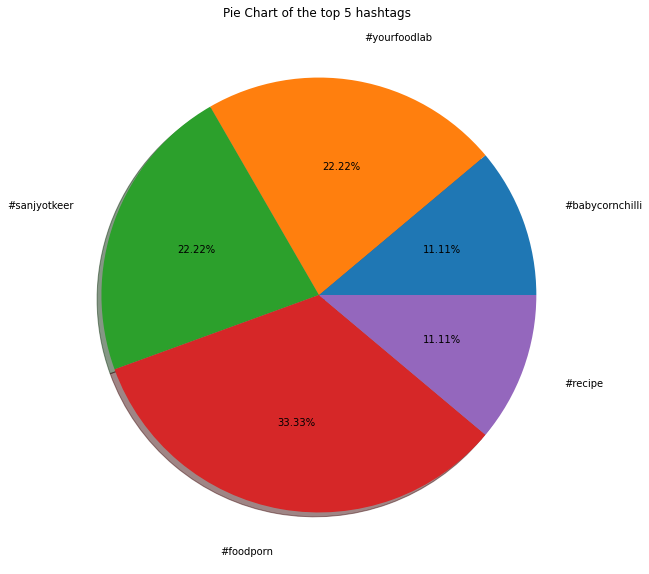

In [156]:
# 2.5 - # 5 - Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

#plotting pie chart showing words and their frequencies
x=hash_word[:5]
y=frequency[:5]
plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, autopct='%.2f%%', shadow=True, labeldistance=1.2)
plt.title('Pie Chart of the top 5 hashtags ')
plt.show()

In [159]:
# 3  
#     You need to also calculate average followers : likes ratio for the obtained handles.
# 1 - Followers : Likes ratio is calculated as follows:
# 2 - Find out the likes of the top 10 posts of the 5 handles obtained earlier.
# 3 - Calculate the average likes for a handle.
# 4 - Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
# 5 - Create a bar graph to depict the above obtained information.

In [195]:
# 3.3 - Calculate the average likes for a handle.

#calculating average likes by dividing each user total likes by 10
avg_likes = []
for likes in user_likes:
    avg = user_likes[likes] / 10
    avg_likes.append(avg)
    
print(avg_likes)

[46902.2, 20028.8, 2934.7, 34124.1, 1242.8]


In [198]:
#calculating ratio of average followers by dividing each user's followers by the user's average likes

avg_followers = []
i = 0
for user in d_names:
    avg = d_names[user] / avg_likes[i]
    avg_followers.append(avg)
    i += 1
print(avg_followers)

[80.90776125640163, 97.82508188208979, 587.4280164923161, 37.97155089804566, 964.565497264242]


In [200]:
#storing the names in the dictionary into a list
user_list = [i for i in d_names]    

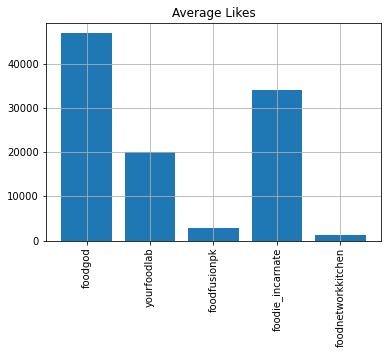

In [205]:
# Create a bar graph to depict the above obtained information.

#plotting bar graph for users and their average likes
plt.bar(user_list,avg_likes)
plt.title('Average Likes')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

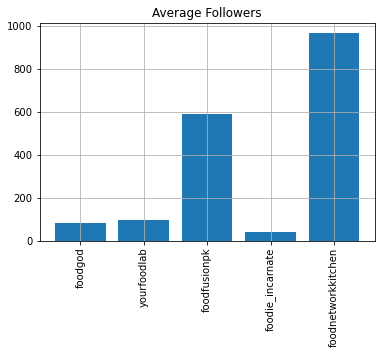

In [206]:

#plotting bar graph for the users and their average followers 
plt.bar(user_list,avg_followers)
plt.title('Average Followers')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

